In [1]:
!pip install git+https://github.com/nkoub/multinetx.git

  Cloning https://github.com/nkoub/multinetx.git to /tmp/pip-req-build-jn9jji69
  Running command git clone -q https://github.com/nkoub/multinetx.git /tmp/pip-req-build-jn9jji69
     |████████████████████████████████| 1.8MB 5.0MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 235kB 64.9MB/s 
  Created wheel for multinetx: filename=multinetx-2.3-cp36-none-any.whl size=19133 sha256=9e667f2f7e5357674417f5bd68f9d53431bcd0d41e9d5f5d074e47d83b979116
  Stored in directory: /tmp/pip-ephem-wheel-cache-jq3z168v/wheels/21/0b/58/cbea6f50dcb99fe22d387f29567e5eb54c0688b198b3640780
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=4cee23499aeacc67aab1b2b73add6bfc3dbbcb0315de9dcb3c25b62068856bc2
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built multinetx networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but y

In [0]:
# Import standard python packages for numerics and plots
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Import the package multiNetX
import multinetx as mx

In [0]:
# Create three Erd“os- R’enyi networks with N nodes for each layer
N = 5
g1 = mx.generators.erdos_renyi_graph(N,0.9,seed=218)
g2 = mx.generators.erdos_renyi_graph(N,0.9,seed=211)
g3 = mx.generators.erdos_renyi_graph(N,0.9,seed=208)

In [0]:
# Create an 3Nx3N lil sparse matrix. It will be used to describe the layers interconnection
adj_block = mx.lil_matrix(np.zeros((N*3,N*3)))

In [0]:
# Define the type of interconnection among the layers (here we use identity matrices thus connecting one-to-one the nodes among layers)
adj_block[0: N, N:2*N] = np.identity(N) # L_12
adj_block[0: N,2*N:3*N] = np.identity(N) # L_13
adj_block[N:2*N,2*N:3*N] = np.identity(N) # L_23

# use symmetric inter-adjacency matrix
adj_block += adj_block.T

In [0]:
# Create an instance of the MultilayerGraph class
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3], inter_adjacency_matrix=adj_block)

In [0]:
# Weights can be added to the edges
mg.set_edges_weights(inter_layer_edges_weight=4)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


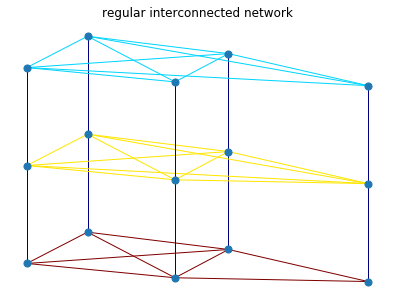

In [9]:
# Plot the adjacency matrix and the multiplex networks
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(122)
ax1.axis('off')
ax1.set_title('regular interconnected network')
pos = mx.get_position(mg, mx.fruchterman_reingold_layout(mg.get_layer(0)), layer_vertical_shift=1.4, layer_horizontal_shift=0.0, proj_angle=7)
mx.draw_networkx(mg,pos=pos,ax=ax1,node_size=50,with_labels=False, edge_color=[mg[a][b]['weight'] for a,b in mg.edges()], edge_cmap=plt.cm.jet_r)
plt.show()